In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [2]:
data = []
labels = []
classes = 10
getpath = os.getcwd()

In [3]:
#image and label
j=0
for i in range(classes):
    if i == 0 :
        j = 9
    elif i == 1:
        j = 14
    elif i == 2:
        j = 16
    elif i == 3:
        j = 18
    elif i == 4 :
        j = 21
    elif i == 5 :
        j = 27
    elif i == 6:
        j = 28
    elif i == 7:
        j = 34
    elif i == 8:
        j = 35
    elif i == 9:
        j = 38
    path = os.path.join(getpath,'Train',str(j))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error")

In [4]:
print(j)

38


In [5]:
#print(os.listdir(path))

In [6]:
print(path)

C:\Users\Chaterine\TUGASAKHIR\tes2\Train\38


In [7]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [8]:
print(data.shape, labels.shape)

(8670, 30, 30, 3) (8670,)


In [9]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=9)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


(6936, 30, 30, 3) (1734, 30, 30, 3) (6936,) (1734,)


In [10]:
print (y_train.shape)

(6936, 10)


In [11]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [13]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Train on 6936 samples, validate on 1734 samples
Epoch 1/15
6936/6936 [==============================] - 33s 5ms/step - loss: 1.7861 - accuracy: 0.6377 - val_loss: 0.2435 - val_accuracy: 0.9446
Epoch 2/15
6936/6936 [==============================] - 25s 4ms/step - loss: 0.3193 - accuracy: 0.9142 - val_loss: 0.2056 - val_accuracy: 0.9406
Epoch 3/15
6936/6936 [==============================] - 23s 3ms/step - loss: 0.2018 - accuracy: 0.9409 - val_loss: 0.0793 - val_accuracy: 0.9862
Epoch 4/15
6936/6936 [==============================] - 28s 4ms/step - loss: 0.1548 - accuracy: 0.9579 - val_loss: 0.0499 - val_accuracy: 0.9890
Epoch 5/15
6936/6936 [==============================] - 22s 3ms/step - loss: 0.1461 - accuracy: 0.9575 - val_loss: 0.0524 - val_accuracy: 0.9862
Epoch 6/15
6936/6936 [==============================] - 23s 3ms/step - loss: 0.1074 - accuracy: 0.9710 - val_loss: 0.0401 - val_accuracy: 0.9913
Epoch 7/15
6936/6936 [==============================] - 23s 3ms/step - loss: 0.101

In [17]:
model.save("model.h5")


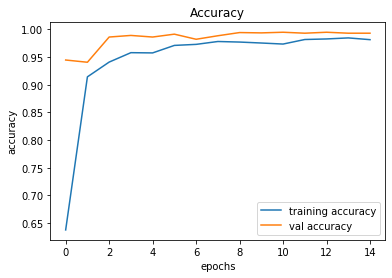

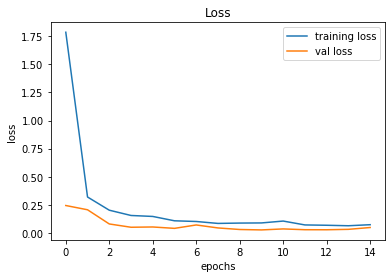

In [18]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [19]:
#test akurasi data
from sklearn.metrics import accuracy_score


y_test = pd.read_csv('Test1.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)


In [20]:
#akurasi
print(accuracy_score(labels, pred))

0.9845878136200716
